In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## 결측치 제거한 데이터 EDA

In [2]:
# 데이터셋 불러오기

df_deleted = pd.read_csv('/Users/uisik/Desktop/keepup/project/arrhythmia_prevention/data/df_deleted.csv', index_col=0)
df_deleted

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),흡연상태,음주여부,허리신장비율,최종점수,위험군
0,1,45,165,72.1,127.0,79.0,90.0,1.0,0.0,0.437,2,0
1,2,65,150,81.0,110.0,73.0,87.0,1.0,0.0,0.540,4,1
2,2,60,155,70.0,123.0,80.0,102.0,1.0,0.0,0.452,3,0
3,1,65,160,90.8,134.0,84.0,146.0,1.0,0.0,0.568,5,1
4,2,60,155,75.2,144.0,89.0,110.0,1.0,0.0,0.485,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2,65,145,81.0,132.0,78.0,124.0,1.0,0.0,0.559,5,1
999996,2,60,160,76.5,100.0,64.0,98.0,1.0,1.0,0.478,3,0
999997,1,45,175,85.0,110.0,64.0,83.0,1.0,1.0,0.486,3,0
999998,2,45,160,91.0,137.0,82.0,111.0,1.0,0.0,0.569,4,1


In [3]:
# 데이터 타입 및 결측치 확인

df_deleted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   성별코드        1000000 non-null  int64  
 1   연령대         1000000 non-null  int64  
 2   신장(5Cm단위)   1000000 non-null  int64  
 3   허리둘레        1000000 non-null  float64
 4   수축기 혈압      1000000 non-null  float64
 5   이완기 혈압      1000000 non-null  float64
 6   식전혈당(공복혈당)  1000000 non-null  float64
 7   흡연상태        1000000 non-null  float64
 8   음주여부        1000000 non-null  float64
 9   허리신장비율      1000000 non-null  float64
 10  최종점수        1000000 non-null  int64  
 11  위험군         1000000 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 99.2 MB


In [4]:
# 기초 통계량 확인

df_deleted.describe()

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),흡연상태,음주여부,허리신장비율,최종점수,위험군
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000
mean,1.489311,59.588785,160.964085,82.357056,124.825608,76.817358,104.217759,1.557230,0.584881,0.512231,3.540817,0.57374
std,0.499886,10.855181,9.197899,9.622113,14.696021,9.953183,25.319870,0.783676,0.492743,0.058032,1.452461,0.69025
min,1.000000,45.000000,130.000000,5.800000,64.000000,30.000000,1.000000,1.000000,0.000000,0.036000,0.000000,0.00000
25%,1.000000,50.000000,155.000000,76.000000,115.000000,70.000000,91.000000,1.000000,0.000000,0.473000,2.000000,0.00000
50%,1.000000,60.000000,160.000000,82.000000,124.000000,77.000000,99.000000,1.000000,1.000000,0.509000,3.000000,0.00000
75%,2.000000,65.000000,170.000000,89.000000,134.000000,83.000000,109.000000,2.000000,1.000000,0.547000,4.000000,1.00000
max,2.000000,90.000000,195.000000,999.000000,260.000000,190.000000,950.000000,3.000000,1.000000,6.244000,10.000000,4.00000


In [5]:
# 데이터 분포 확인 함수

def hist(df, feature):
    
    plt.figure(figsize=(5,5))
    plt.hist(df[feature])

    print(f'{feature} 데이터 분포입니다.')
    plt.show()
    print('\n')

위험군 데이터 분포입니다.


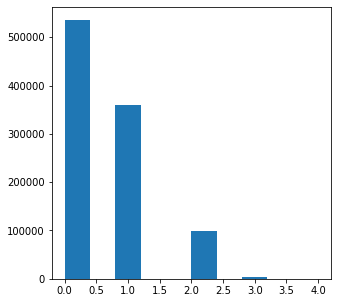

In [6]:
hist(df_deleted, '위험군')

In [7]:
# 이상치 탐지 함수(iqr method)
# iqr method와 박스플롯 그래프를 활용하여 탐지

def outlier(df, feature): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정
    q25, q75 = np.quantile(df[feature], 0.25), np.quantile(df[feature], 0.75)          
    
    # IQR(사분위 범위) 계산  
    iqr = q75 - q25    
    
    # outlier cutoff 계산    
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print(f'{feature} 이상치 요약 : \n')
    print('IQR(사분위 범위)은',round(iqr, 3), '입니다.')     
    print('lower bound 값은', round(lower, 3), '입니다.')     
    print('upper bound 값은', round(upper, 3), '입니다.')    
    
    # 1사분위와 4사분위에 속해있는 데이터 각각 저장하기     
    data1 = df[df[feature] > upper]     
    data2 = df[df[feature] < lower]    
    
    # 이상치 총 개수
    return print(f'총 이상치 개수는 {data1.shape[0]+data2.shape[0]}개 입니다. \n\n')

In [35]:
# 이상치 시각화 함수
def outlier_viz(df, features):
    plt.rcParams['font.family'] = 'AppleGothic'
    
    # 축 설정위한 변수
    row = 1
    columns = 4
    
    # 입력된 특성수가 4개 이상일 경우 2행 4열로 출력
    if len(features) > columns:
        row += 1
    
    # 그래프 축 설정
    fig, axes = plt.subplots(row, columns)
    
    # 시각화
    i = 0
    j = 0
    for feature in features:
        if row == 1:
            sns.boxplot(y=feature, x='위험군', data=df, ax=axes[i])
            axes[i].set_title(f'{feature} 이상치')
            i += 1
        elif row == 2:
            sns.boxplot(y=feature, x='위험군', data=df, ax=axes[i, j])
            axes[i, j].set_title(f'{feature} 이상치', fontsize=25)
            j += 1
            
            if j > 3 :
                i += 1
                j = 0

    if len(features) <= columns:
        plt.gcf().set_size_inches(15, 9)
    else:
        plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
        plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
        plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
        plt.gcf().set_size_inches(30, 18)
        
    fig.tight_layout()

    return plt.show()

In [9]:
# 이상치 제거 함수

def del_outlier(df, feature, upper_bound, lower_bound):
    
    df = df[(df[feature] < upper_bound) & (df[feature] > lower_bound)]
    
    return df

In [58]:
# 전체 특성의 이상치 파악

for header in df_deleted.columns.tolist():
    outlier(df_deleted, header)

성별코드 이상치 요약 : 

IQR(사분위 범위)은 1.0 입니다.
lower bound 값은 -0.5 입니다.
upper bound 값은 3.5 입니다.
총 이상치 개수는 0개 입니다. 


연령대 이상치 요약 : 

IQR(사분위 범위)은 15.0 입니다.
lower bound 값은 27.5 입니다.
upper bound 값은 87.5 입니다.
총 이상치 개수는 6237개 입니다. 


신장(5Cm단위) 이상치 요약 : 

IQR(사분위 범위)은 15.0 입니다.
lower bound 값은 132.5 입니다.
upper bound 값은 192.5 입니다.
총 이상치 개수는 406개 입니다. 


허리둘레 이상치 요약 : 

IQR(사분위 범위)은 13.0 입니다.
lower bound 값은 56.5 입니다.
upper bound 값은 108.5 입니다.
총 이상치 개수는 6916개 입니다. 


수축기 혈압 이상치 요약 : 

IQR(사분위 범위)은 19.0 입니다.
lower bound 값은 86.5 입니다.
upper bound 값은 162.5 입니다.
총 이상치 개수는 13157개 입니다. 


이완기 혈압 이상치 요약 : 

IQR(사분위 범위)은 13.0 입니다.
lower bound 값은 50.5 입니다.
upper bound 값은 102.5 입니다.
총 이상치 개수는 11059개 입니다. 


식전혈당(공복혈당) 이상치 요약 : 

IQR(사분위 범위)은 18.0 입니다.
lower bound 값은 64.0 입니다.
upper bound 값은 136.0 입니다.
총 이상치 개수는 69487개 입니다. 


흡연상태 이상치 요약 : 

IQR(사분위 범위)은 1.0 입니다.
lower bound 값은 -0.5 입니다.
upper bound 값은 3.5 입니다.
총 이상치 개수는 0개 입니다. 


음주여부 이상치 요약 : 

IQR(사분위 범위)은 1.0 입니다.
lower bound 값은 -1.5 입니다.
upper bound 값은 2.5 입니

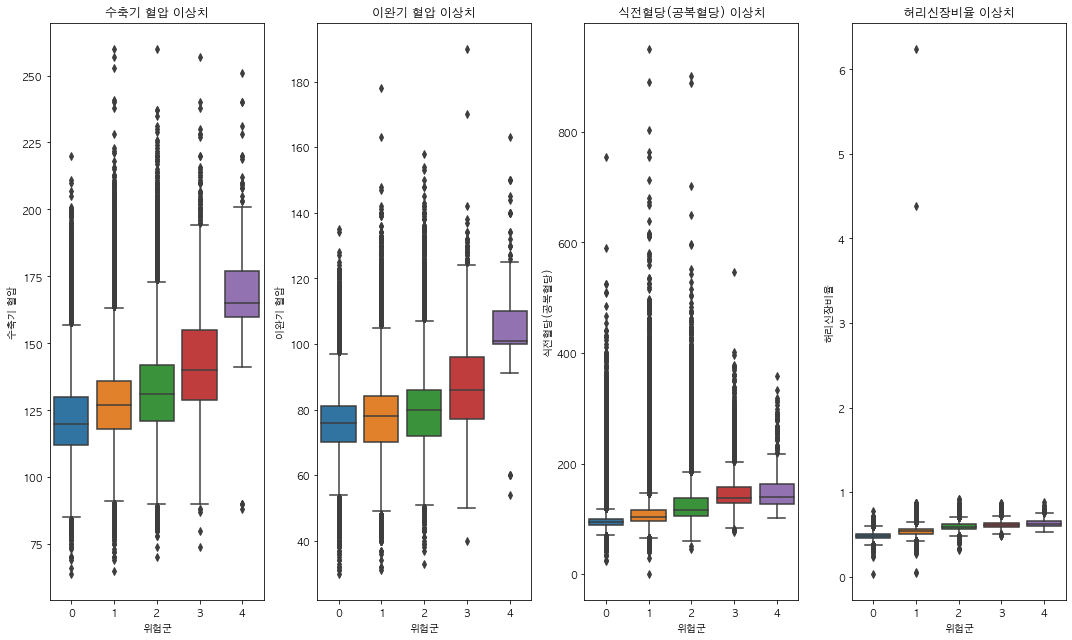

In [10]:
# 이상치 박스플랏
labels_deleted = ['수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '허리신장비율']
outlier_viz(df_deleted, labels_deleted)

### 이상치 최소값, 최대값 설정

1. 성별코드, 연령대, 흡연상태, 음주여부, 최종점수, 위험군의 이상치 결과는 의미가 없기때문에 생각하지 않음
2. 수축기 혈압의 경우 임상적으로 220까지 측정되는 경우(노인성 고혈압)가 있기 때문에 iqr method를 활용했을 때의 최대치인 162.5보다 높게 220을 최대치로 설정
3. 이완기 혈압의 경우 임상적으로 120까지 측정되는 경우가 있기 때문에 iqr method의 최대치인 102.5보다 높게 120을 최대치로 설정
4. 공복혈당의 경우 개인이 혈당측정기를 사용하여 측정할 수 있는 최대치인 500으로 설정(위급한 상황이지만 일시적인 경우가 많고 500mg 이상을 꾸준히 기록한다면 개인의 상태가 일시적인 것보다 공복혈당장애를 겪고있을 가능성이 매우 높기 때문에)
5. 허리신장비율의 경우 제시되는 기준을 활용하여 최소치는 0.33 최대치는 iqr method의 최대치로 설정
6. 특히 허리신장비율의 경우 box plot을 분석한 결과 허리신장비율이 4 이상인 데이터 총 2건과 0.1 이하인 데이터가 발견되어 추가적인 확인 필요

#### 허리신장비율 데이터 추가 확인

In [11]:
df_deleted[df_deleted['허리신장비율'] >= 4]

# 각 데이터별 신장에 비해(155cm와 160cm) 허리둘레가(680cm, 999cm)라는 
# 이해할 수 없는 수치가 기록되어있어서 삭제 결정

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),흡연상태,음주여부,허리신장비율,최종점수,위험군
484092,2,45,160,999.0,118.0,74.0,76.0,1.0,0.0,6.244,4,1
590866,2,45,155,680.0,99.0,64.0,99.0,1.0,0.0,4.387,4,1


In [12]:
df_deleted[df_deleted['허리신장비율'] <= 0.3]

# 확인 결과 허리둘레가 한 자리수로 기록된 데이터를 제외하면 
# 모두 가능성 있는 체형이라 판단되어 허리신장비율이 0.1 이하인 데이터만 제거

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),흡연상태,음주여부,허리신장비율,최종점수,위험군
120539,2,60,160,8.7,130.0,84.0,112.0,1.0,1.0,0.054,5,1
142277,1,75,155,42.0,120.0,60.0,143.0,1.0,0.0,0.271,5,1
282296,1,85,150,41.0,120.0,80.0,95.0,2.0,1.0,0.273,3,0
310919,2,85,145,36.0,110.0,80.0,73.0,1.0,0.0,0.248,3,0
321346,2,45,160,5.8,101.0,60.0,76.0,1.0,1.0,0.036,3,0
589655,1,60,175,50.6,113.0,73.0,116.0,2.0,0.0,0.289,3,0
854340,2,50,150,35.0,126.0,87.0,96.0,1.0,0.0,0.233,2,0
879765,2,65,140,39.0,105.0,67.0,113.0,1.0,0.0,0.279,4,1
900467,1,45,170,8.2,130.0,89.0,107.0,2.0,1.0,0.048,4,1


7. 결과적으로 허리신장비율의 이상치 최대값은 4, 최소값은 0.1로 설정 후 제거 진행

In [13]:
# 이상치 제거

df_deleted_final = del_outlier(df_deleted, '수축기 혈압', 220, 86.5)
df_deleted_final = del_outlier(df_deleted_final, '이완기 혈압', 120, 50.5)
df_deleted_final = del_outlier(df_deleted_final, '식전혈당(공복혈당)', 500, 64)
df_deleted_final = del_outlier(df_deleted_final, '허리신장비율', 4, 0.1)
df_deleted_final

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),흡연상태,음주여부,허리신장비율,최종점수,위험군
0,1,45,165,72.1,127.0,79.0,90.0,1.0,0.0,0.437,2,0
1,2,65,150,81.0,110.0,73.0,87.0,1.0,0.0,0.540,4,1
2,2,60,155,70.0,123.0,80.0,102.0,1.0,0.0,0.452,3,0
3,1,65,160,90.8,134.0,84.0,146.0,1.0,0.0,0.568,5,1
4,2,60,155,75.2,144.0,89.0,110.0,1.0,0.0,0.485,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2,65,145,81.0,132.0,78.0,124.0,1.0,0.0,0.559,5,1
999996,2,60,160,76.5,100.0,64.0,98.0,1.0,1.0,0.478,3,0
999997,1,45,175,85.0,110.0,64.0,83.0,1.0,1.0,0.486,3,0
999998,2,45,160,91.0,137.0,82.0,111.0,1.0,0.0,0.569,4,1


In [14]:
class_ratio_deleted = df_deleted_final['위험군'].value_counts()
class_ratio_deleted

0    533228
1    359083
2     98011
3      4531
4       532
Name: 위험군, dtype: int64

In [15]:
# 정상(0점), 저위험군(1점)에 해당하는 비율

print('정상, 저위험군 비율 :', round(len(df_deleted_final[df_deleted_final['위험군'] <= 1]) / len(df_deleted_final), 3),'%')

# 중등도(2점), 고위험군(3점), 극위험군(4점)에 해당하는 비율
print('나머지 위험군 비율 :', round(len(df_deleted_final[df_deleted_final['위험군'] >= 2]) / len(df_deleted_final), 3),'%')

정상, 저위험군 비율 : 0.896 %
나머지 위험군 비율 : 0.104 %


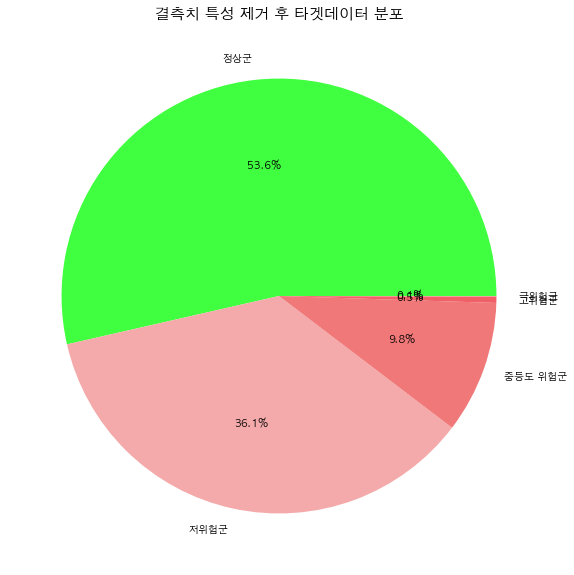

In [16]:
# 타겟 데이터 분포 시각화

plt.figure(figsize=(10,10))
plt.pie(class_ratio_deleted,
        labels=['정상군','저위험군','중등도 위험군','고위험군','극위험군'],
        colors=['#40FF40', '#F4AAAA','#F07878', '#F06066', '#F08C8C'], autopct='%.1f%%')
plt.title('결측치 특성 제거 후 타겟데이터 분포', fontsize=15)
plt.show()

In [17]:
# 연령대 평균

age_avg_deleted = round(df_deleted_final['연령대'].mean(), 1)
print(f'연령대 평균 : {age_avg_deleted}세')

연령대 평균 : 59.6세


In [18]:
# 위험군별 특성의 평균 확인
# 전체적으로 각 특성이 어떤 경향을 띄고 있나 확인하기 위함

df_deleted_final.groupby('위험군').mean()

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),흡연상태,음주여부,허리신장비율,최종점수
위험군,,,,,,,,,,,
0,1.434388,57.001189,162.859133,78.274754,121.510977,75.410361,95.392560,1.697692,0.560826,0.480403,2.421658
1,1.507869,61.887586,159.731413,85.640305,127.440764,78.000980,110.779154,1.447805,0.616289,0.536500,4.393636
2,1.702676,65.088817,155.525298,91.962364,132.515279,79.752762,126.427381,1.218914,0.588026,0.591631,6.266572
3,1.750607,63.794968,155.144560,95.786250,141.446921,85.911057,147.957184,1.096447,0.876628,0.617331,8.000000
4,1.708647,62.866541,155.742481,98.204135,164.928571,102.270677,150.172932,1.144737,0.744361,0.630498,9.090226


In [19]:
# 위험군별 특성 평균 시각화 함수

def feature_mean(df, features):

    df.groupby(['위험군']).mean().plot(y=features)
    plt.gcf().set_size_inches(8, 5)
    
    if (str(df) == str(df_deleted_final)) | (str(df) == str(df_deleted)): 
        plt.title('결측치 특성 제거 후 특성 평균 추이', fontsize=15)
    else:
        plt.title('결측치 대체 후 특성 평균 추이', fontsize=15)

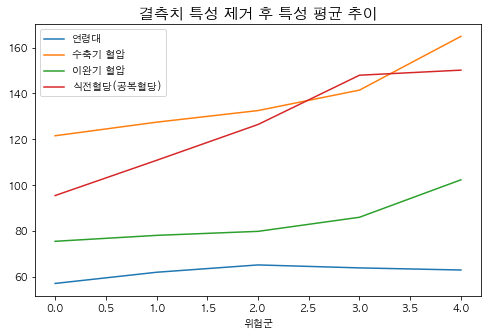

In [20]:
# 위험군별 특성 평균 시각화

labels_deleted_for_mean = ['연령대', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)']

feature_mean(df_deleted_final, labels_deleted_for_mean)

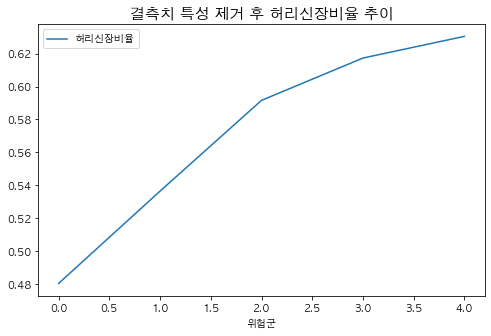

In [21]:
df_deleted_final.groupby(['위험군']).mean().plot(y=['허리신장비율'])
plt.gcf().set_size_inches(8, 5)
plt.title('결측치 특성 제거 후 허리신장비율 추이', fontsize=15);

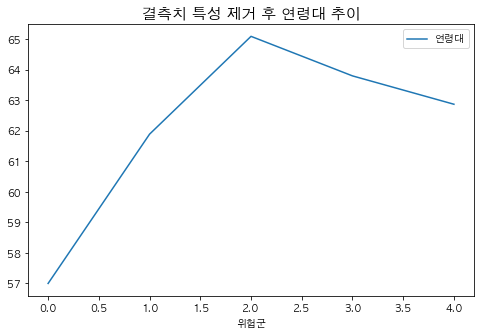

In [22]:
df_deleted_final.groupby(['위험군']).mean().plot(y=['연령대'])
plt.gcf().set_size_inches(8, 5)
plt.title('결측치 특성 제거 후 연령대 추이', fontsize=15);

#### 예측에 불필요한 특성 제거

1. 신장과 허리둘레 -> 예측인자로 활용되는 허리신장비율 특성을 생성하는 데에 사용함. 특성 자체가 예측인자로 활용되지는 않기 때문에 제거

2. 최종점수 -> 타겟 특성인 위험군 특성 생성 후 레이블링까지 마무리 했기 때문에 제거
3. 인덱스 초기화

In [23]:
df_deleted_final = df_deleted_final.drop(columns=['신장(5Cm단위)', '허리둘레', '최종점수'], axis=1).reset_index(drop=True)
df_deleted_final

,성별코드,연령대,수축기 혈압,이완기 혈압,식전혈당(공복혈당),흡연상태,음주여부,허리신장비율,위험군
0,1,45,127.0,79.0,90.0,1.0,0.0,0.437,0
1,2,65,110.0,73.0,87.0,1.0,0.0,0.540,1
2,2,60,123.0,80.0,102.0,1.0,0.0,0.452,0
3,1,65,134.0,84.0,146.0,1.0,0.0,0.568,1
4,2,60,144.0,89.0,110.0,1.0,0.0,0.485,1
...,...,...,...,...,...,...,...,...,...
995380,2,65,132.0,78.0,124.0,1.0,0.0,0.559,1
995381,2,60,100.0,64.0,98.0,1.0,1.0,0.478,0
995382,1,45,110.0,64.0,83.0,1.0,1.0,0.486,0
995383,2,45,137.0,82.0,111.0,1.0,0.0,0.569,1


In [24]:
# 결측치 제거 후 최종 데이터셋 저장

df_deleted_final.to_csv('/Users/uisik/Desktop/keepup/project/arrhythmia_prevention/data/df_deleted_final.csv')

## 결측치 대체한 데이터 EDA

In [25]:
# 데이터셋 불러오기

df = pd.read_csv('/Users/uisik/Desktop/keepup/project/arrhythmia_prevention/data/df.csv', index_col=0)
df

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,중성지방,HDL 콜레스테롤,LDL 콜레스테롤,흡연상태,음주여부,허리신장비율,최종점수,위험군
0,1.0,45.0,165.0,72.1,127.0,79.0,90.0,188.000000,58.000000,58.000000,118.000000,1.0,0.0,0.437,4,0
1,2.0,65.0,150.0,81.0,110.0,73.0,87.0,196.326753,107.014421,58.551332,116.408854,1.0,0.0,0.540,6,0
2,2.0,60.0,155.0,70.0,123.0,80.0,102.0,200.062149,103.676066,63.191703,116.211756,1.0,0.0,0.452,4,0
3,1.0,65.0,160.0,90.8,134.0,84.0,146.0,194.115555,169.881706,47.216657,113.175586,1.0,0.0,0.568,8,2
4,2.0,60.0,155.0,75.2,144.0,89.0,110.0,220.000000,171.000000,53.000000,133.000000,1.0,0.0,0.485,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.0,65.0,145.0,81.0,132.0,78.0,124.0,178.000000,301.000000,43.000000,75.000000,1.0,0.0,0.559,9,3
999996,2.0,60.0,160.0,76.5,100.0,64.0,98.0,288.000000,93.000000,71.000000,198.000000,1.0,1.0,0.478,8,2
999997,1.0,45.0,175.0,85.0,110.0,64.0,83.0,194.434857,114.836737,55.330437,116.471475,1.0,1.0,0.486,5,0
999998,2.0,45.0,160.0,91.0,137.0,82.0,111.0,208.000000,113.000000,59.000000,126.000000,1.0,0.0,0.569,6,0


In [26]:
# 데이터 타입 및 결측치 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   성별코드        1000000 non-null  float64
 1   연령대         1000000 non-null  float64
 2   신장(5Cm단위)   1000000 non-null  float64
 3   허리둘레        1000000 non-null  float64
 4   수축기 혈압      1000000 non-null  float64
 5   이완기 혈압      1000000 non-null  float64
 6   식전혈당(공복혈당)  1000000 non-null  float64
 7   총 콜레스테롤     1000000 non-null  float64
 8   중성지방        1000000 non-null  float64
 9   HDL 콜레스테롤   1000000 non-null  float64
 10  LDL 콜레스테롤   1000000 non-null  float64
 11  흡연상태        1000000 non-null  float64
 12  음주여부        1000000 non-null  float64
 13  허리신장비율      1000000 non-null  float64
 14  최종점수        1000000 non-null  int64  
 15  위험군         1000000 non-null  int64  
dtypes: float64(14), int64(2)
memory usage: 129.7 MB


In [27]:
# 기초 통계량 확인

df.describe()

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,중성지방,HDL 콜레스테롤,LDL 콜레스테롤,흡연상태,음주여부,허리신장비율,최종점수,위험군
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.489311,59.588785,160.964085,82.357071,124.876729,76.812644,104.295891,198.454720,134.700760,56.617278,115.120098,1.557415,0.584783,0.512231,5.867250,0.721886
std,0.499886,10.855181,9.197899,9.622222,14.709381,9.955351,25.323201,27.649331,68.078038,11.520763,25.379065,0.783658,0.492718,0.058032,2.076075,1.176214
min,1.000000,45.000000,130.000000,5.800000,64.000000,30.000000,1.000000,54.000000,-26.645441,1.000000,-610.855369,0.768660,-0.227984,0.036000,0.000000,0.000000
25%,1.000000,50.000000,155.000000,76.000000,115.000000,70.000000,91.000000,192.716595,99.695156,50.452906,112.087005,1.000000,0.000000,0.473000,4.000000,0.000000
50%,1.000000,60.000000,160.000000,82.000000,124.000000,77.000000,99.000000,198.504314,127.000000,55.787782,115.335063,1.000000,1.000000,0.509000,6.000000,0.000000
75%,2.000000,65.000000,170.000000,89.000000,134.000000,83.000000,109.000000,203.747719,156.794593,62.079906,117.571500,2.000000,1.000000,0.547000,7.000000,1.000000
max,2.000000,90.000000,195.000000,999.000000,260.000000,190.000000,950.000000,2416.000000,6999.000000,960.000000,2395.000000,3.000000,1.000000,6.244000,18.000000,4.000000


결측치 제거한 데이터셋과 다르게 **중성지방, LDL 콜레스테롤, 음주여부 특성**에서 최소값이 **음수**인 경우 발생</br>
음수가 나올 수 없는 특성이지만 결측치를 학습하여 대체할 때 음수값이 나온 것으로 생각</br>
이상치 파악하면서 한번 더 파악한 후에 제거</br>

위험군 데이터 분포입니다.


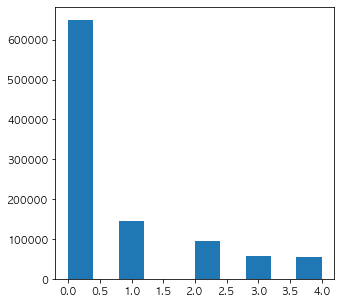

In [28]:
# 타겟 데이터 분포 확인

hist(df, '위험군')

고위험군의 비율이 결측치 제거한 데이터셋에 비해 몇 배 높음(비율계산해보기)

In [29]:
# 전체 특성의 이상치 파악

for header in df.columns.tolist():
    outlier(df, header)

성별코드 이상치 요약 : 

IQR(사분위 범위)은 1.0 입니다.
lower bound 값은 -0.5 입니다.
upper bound 값은 3.5 입니다.
총 이상치 개수는 0개 입니다. 


연령대 이상치 요약 : 

IQR(사분위 범위)은 15.0 입니다.
lower bound 값은 27.5 입니다.
upper bound 값은 87.5 입니다.
총 이상치 개수는 6237개 입니다. 


신장(5Cm단위) 이상치 요약 : 

IQR(사분위 범위)은 15.0 입니다.
lower bound 값은 132.5 입니다.
upper bound 값은 192.5 입니다.
총 이상치 개수는 406개 입니다. 


허리둘레 이상치 요약 : 

IQR(사분위 범위)은 13.0 입니다.
lower bound 값은 56.5 입니다.
upper bound 값은 108.5 입니다.
총 이상치 개수는 6916개 입니다. 


수축기 혈압 이상치 요약 : 

IQR(사분위 범위)은 19.0 입니다.
lower bound 값은 86.5 입니다.
upper bound 값은 162.5 입니다.
총 이상치 개수는 13157개 입니다. 


이완기 혈압 이상치 요약 : 

IQR(사분위 범위)은 13.0 입니다.
lower bound 값은 50.5 입니다.
upper bound 값은 102.5 입니다.
총 이상치 개수는 11059개 입니다. 


식전혈당(공복혈당) 이상치 요약 : 

IQR(사분위 범위)은 18.0 입니다.
lower bound 값은 64.0 입니다.
upper bound 값은 136.0 입니다.
총 이상치 개수는 69487개 입니다. 


총 콜레스테롤 이상치 요약 : 

IQR(사분위 범위)은 11.031 입니다.
lower bound 값은 176.17 입니다.
upper bound 값은 220.294 입니다.
총 이상치 개수는 237127개 입니다. 


중성지방 이상치 요약 : 

IQR(사분위 범위)은 57.099 입니다.
lower bound 값은 14.046 입니다.

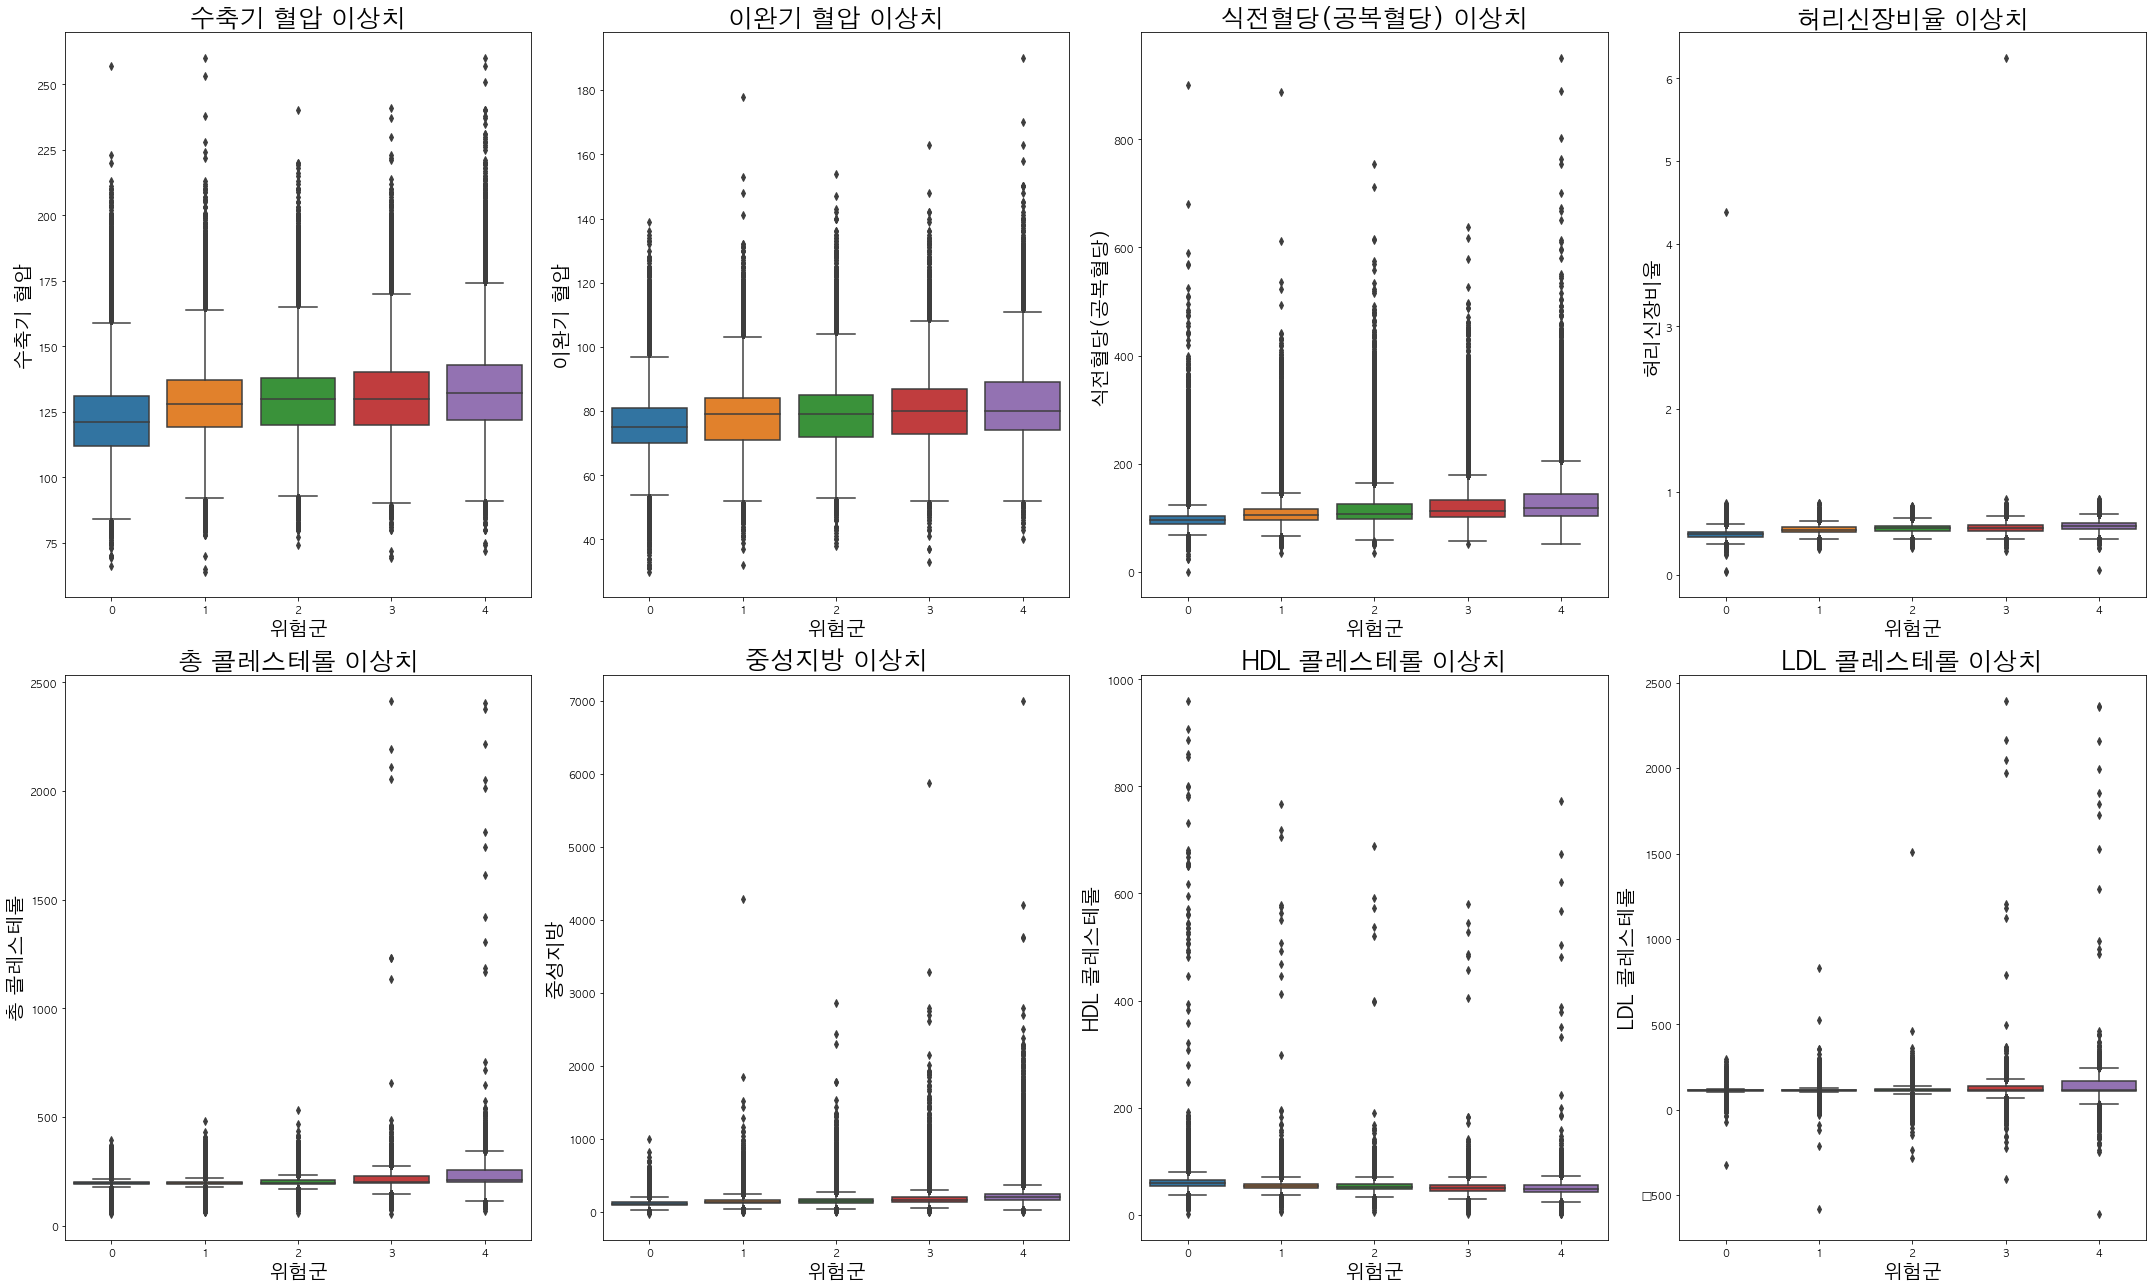

In [36]:
# 이상치 박스플랏
labels = ['수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '허리신장비율',
         '총 콜레스테롤', '중성지방', 'HDL 콜레스테롤', 'LDL 콜레스테롤']
outlier_viz(df, labels)

### 이상치 최소값, 최대값 설정

1. 성별코드, 연령대, 흡연상태, 음주여부, 최종점수, 위험군의 이상치 결과는 의미가 없기때문에 생각하지 않음
2. 수축기 혈압의 경우 임상적으로 220까지 측정되는 경우(노인성 고혈압)가 있기 때문에 iqr method를 활용했을 때의 최대치인 162.5보다 높은 220을 최대치로 설정
3. 이완기 혈압의 경우 임상적으로 120까지 측정되는 경우가 있기 때문에 iqr method의 최대치인 102.5보다 높은 120을 최대치로 설정
4. 공복혈당의 경우 개인이 혈당측정기를 사용하여 측정할 수 있는 최대치인 500으로 설정(위급한 상황이지만 일시적인 경우가 대부분이고 500mg 이상을 기록한다면 개인의 상태가 일시적인 것보다 공복혈당장애를 겪고있을 가능성이 매우 높기 때문에)
5. 총 콜레스테롤의 경우 지질대사를 고려하더라도 500mg 이상 측정되는 경우가 극히 드물기 때문에 오표기로 판단하고 500을 최대치로 설정
6. 중성지방의 경우 식사 후 중성지방 수치가 공복시 수치보다 5배 이상 증가하기때문에 검진 전 주의사항을 충분히 숙지하지 못한 상태로 검진을 실시한 것으로 판단 기준치의 최대치인 500으로 설정
7. HDL 콜레스테롤의 경우 높으면 높을수록 좋다는 연구결과가 있지만 이는 어디까지나 LDL 콜레스테롤과 총 콜레스테롤의 전체 비율을 따져봐야할 문제이다. 따라서 이번 프로젝트에서는 임상적으로 측정되는 200mg으로 최대치를 설정, 최소치 또한 임상적인 근거로 30mg으로 설정
8. LDL 콜레스테롤의 경우 결측치 처리 과정에서 최소값이 음수인 경우가 발생하여 임상에서 평균적으로 측정되는 40mg을 최소치로 설정, 최대치는 우성유전질환을 고려했을 때 최대치인 400mg 으로 설정
9. 허리신장비율의 경우 제시되는 기준을 활용하여 최소치는 0.33 최대치는 iqr method의 값으로 설정
10. 특히 허리 신장비율의 경우 box plot을 분석한 결과 허리신장비율이 4 이상인 데이터 총 2건과 0.1 이하인 데이터가 발견되어 추가적인 확인 필요
11. 음주여부의 최소값이 음수인 데이터 확인 및 제거

In [37]:
df[df['허리신장비율'] >= 4]

# 각 데이터별 신장에 비해(155cm와 160cm) 허리둘레가(680cm, 999cm)라는 
# 이해할 수 없는 수치가 기록되어있어서 삭제 결정

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,중성지방,HDL 콜레스테롤,LDL 콜레스테롤,흡연상태,음주여부,허리신장비율,최종점수,위험군
484092,2.0,45.0,160.0,999.0,118.0,74.0,76.0,270.0,298.0,78.0,132.0,1.0,0.0,6.244,9,3
590866,2.0,45.0,155.0,680.0,99.0,64.0,99.0,177.0,40.0,89.0,80.0,1.0,0.0,4.387,5,0


In [38]:
df[df['허리신장비율'] <= 0.3]

# 확인 결과 허리둘레가 한 자리수로 기록된 데이터를 제외하면 
# 모두 가능성 있는 체형이라 판단되어 0.1 이하의 데이터만 제거

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,중성지방,HDL 콜레스테롤,LDL 콜레스테롤,흡연상태,음주여부,허리신장비율,최종점수,위험군
120539,2.0,60.0,160.0,8.7,130.0,84.0,112.0,331.000000,153.000000,89.000000,211.000000,1.0,1.0,0.054,11,4
142277,1.0,75.0,155.0,42.0,120.0,60.0,143.0,188.802843,67.534292,67.485038,107.872786,1.0,0.0,0.271,6,0
282296,1.0,85.0,150.0,41.0,120.0,80.0,95.0,195.242183,64.115630,72.036928,110.552174,2.0,1.0,0.273,4,0
310919,2.0,85.0,145.0,36.0,110.0,80.0,73.0,132.000000,97.000000,44.000000,68.000000,1.0,0.0,0.248,4,0
321346,2.0,45.0,160.0,5.8,101.0,60.0,76.0,204.351183,-26.645441,94.603700,115.178167,1.0,1.0,0.036,4,0
589655,1.0,60.0,175.0,50.6,113.0,73.0,116.0,178.000000,150.000000,60.000000,88.000000,2.0,0.0,0.289,5,0
854340,2.0,50.0,150.0,35.0,126.0,87.0,96.0,206.221489,55.526021,77.868219,117.358773,1.0,0.0,0.233,3,0
879765,2.0,65.0,140.0,39.0,105.0,67.0,113.0,200.000000,230.000000,25.000000,129.000000,1.0,0.0,0.279,9,3
900467,1.0,45.0,170.0,8.2,130.0,89.0,107.0,207.384990,34.326482,86.387209,114.502718,2.0,1.0,0.048,5,0


In [39]:
df[df['음주여부'] < 0]

# 한 건의 데이터 확인, 제거해도 크게 지장이 없을 것이라 판단하여 제거

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,중성지방,HDL 콜레스테롤,LDL 콜레스테롤,흡연상태,음주여부,허리신장비율,최종점수,위험군
14486,2.0,90.0,155.0,80.0,114.0,68.0,153.0,114.0,79.0,32.0,66.0,1.0,-0.227984,0.516,7,1


In [40]:
idx = df[df['음주여부'] < 0].index
df.drop(idx, inplace=True)

In [41]:
df[df['음주여부'] < 0]

# 삭제된 것 확인

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,중성지방,HDL 콜레스테롤,LDL 콜레스테롤,흡연상태,음주여부,허리신장비율,최종점수,위험군


In [42]:
# 이상치 제거

df_final = del_outlier(df, '수축기 혈압', 220, 86.5)
df_final = del_outlier(df_final, '이완기 혈압', 120, 50.5)
df_final = del_outlier(df_final, '식전혈당(공복혈당)', 500, 64)
df_final = del_outlier(df_final, '허리신장비율', 4, 0.1)
df_final = del_outlier(df_final, '총 콜레스테롤', 500,86.5)
df_final = del_outlier(df_final, '중성지방', 500, 33.2)
df_final = del_outlier(df_final, 'HDL 콜레스테롤', 200, 30)
df_final = del_outlier(df_final, 'LDL 콜레스테롤', 400, 40)
df_final

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,중성지방,HDL 콜레스테롤,LDL 콜레스테롤,흡연상태,음주여부,허리신장비율,최종점수,위험군
0,1.0,45.0,165.0,72.1,127.0,79.0,90.0,188.000000,58.000000,58.000000,118.000000,1.0,0.0,0.437,4,0
1,2.0,65.0,150.0,81.0,110.0,73.0,87.0,196.326753,107.014421,58.551332,116.408854,1.0,0.0,0.540,6,0
2,2.0,60.0,155.0,70.0,123.0,80.0,102.0,200.062149,103.676066,63.191703,116.211756,1.0,0.0,0.452,4,0
3,1.0,65.0,160.0,90.8,134.0,84.0,146.0,194.115555,169.881706,47.216657,113.175586,1.0,0.0,0.568,8,2
4,2.0,60.0,155.0,75.2,144.0,89.0,110.0,220.000000,171.000000,53.000000,133.000000,1.0,0.0,0.485,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.0,65.0,145.0,81.0,132.0,78.0,124.0,178.000000,301.000000,43.000000,75.000000,1.0,0.0,0.559,9,3
999996,2.0,60.0,160.0,76.5,100.0,64.0,98.0,288.000000,93.000000,71.000000,198.000000,1.0,1.0,0.478,8,2
999997,1.0,45.0,175.0,85.0,110.0,64.0,83.0,194.434857,114.836737,55.330437,116.471475,1.0,1.0,0.486,5,0
999998,2.0,45.0,160.0,91.0,137.0,82.0,111.0,208.000000,113.000000,59.000000,126.000000,1.0,0.0,0.569,6,0


In [43]:
class_ratio = df_final['위험군'].value_counts()
class_ratio

0    639466
1    142353
2     92658
3     54542
4     50684
Name: 위험군, dtype: int64

In [44]:
# 정상, 저위험군에 해당하는 비율

print('정상, 저위험군 비율 :', round(len(df_final[df_final['위험군'] <= 1]) / len(df_final), 3),'%')

# 나머지 위험군에 해당하는 비율
print('나머지 위험군 비율 :', round(len(df_final[df_final['위험군'] >= 2]) / len(df_final), 3),'%')

정상, 저위험군 비율 : 0.798 %
나머지 위험군 비율 : 0.202 %


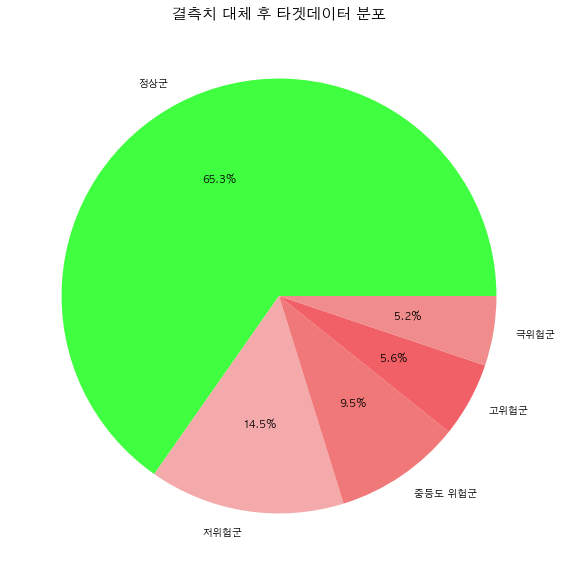

In [45]:
# 타겟 데이터 분포 시각화

plt.figure(figsize=(10,10))
plt.pie(class_ratio,
        labels=['정상군','저위험군','중등도 위험군','고위험군','극위험군'],
        colors=['#40FF40', '#F4AAAA','#F07878', '#F06066', '#F08C8C'], autopct='%.1f%%')
plt.title('결측치 대체 후 타겟데이터 분포', fontsize=15)
plt.show()

In [46]:
# 연령대 평균

age_avg = round(df_final['연령대'].mean(), 1)
print(f'연령대 평균 : {age_avg}세')

연령대 평균 : 59.6세


In [47]:
# 위험군별 특성의 평균 확인
# 전체적으로 어떤 경향을 띄고 있나 확인하기 위함

df_final.groupby('위험군').mean()

,성별코드,연령대,신장(5Cm단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,중성지방,HDL 콜레스테롤,LDL 콜레스테롤,흡연상태,음주여부,허리신장비율,최종점수
위험군,,,,,,,,,,,,,,,
0,1.500500,58.328965,161.469421,78.817139,122.308588,75.480779,97.266104,194.682128,115.623558,59.033304,112.633572,1.554812,0.569062,0.488282,4.632393
1,1.441473,61.927532,160.480987,86.833488,127.904077,78.276957,109.506304,199.374366,146.647195,53.768818,116.441268,1.618860,0.598842,0.542014,7.000000
2,1.477865,62.484999,159.739418,88.922093,129.530983,79.021933,117.202203,203.750013,160.352390,52.366746,119.501915,1.529979,0.601009,0.557774,8.000000
3,1.484947,61.632595,159.873584,90.785654,131.106884,80.301523,123.502327,210.777655,178.031060,50.946672,124.473074,1.498776,0.643620,0.568859,9.000000
4,1.544985,61.142668,159.026320,92.887852,133.564651,81.950429,132.001581,228.112594,203.474252,49.453066,138.284033,1.466608,0.648953,0.584717,10.639689


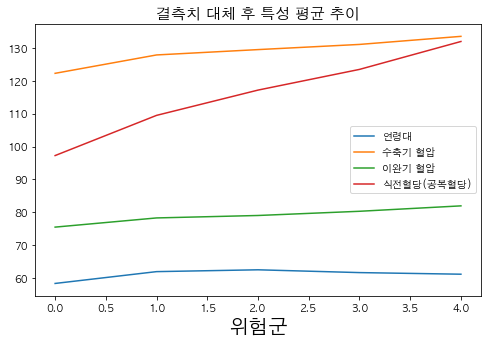

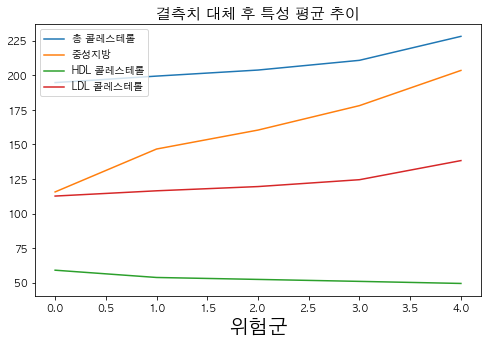

In [48]:
# 위험군별 특성 평균 시각화 

labels_for_mean1 = ['연령대', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)']
labels_for_mean2 = ['총 콜레스테롤', '중성지방', 'HDL 콜레스테롤', 'LDL 콜레스테롤']

feature_mean(df_final, labels_for_mean1)
feature_mean(df_final, labels_for_mean2)

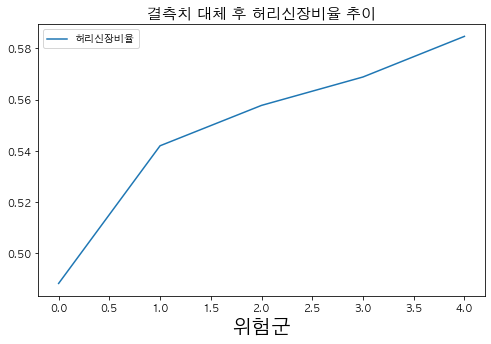

In [49]:
df_final.groupby(['위험군']).mean().plot(y=['허리신장비율'])
plt.gcf().set_size_inches(8, 5)
plt.title('결측치 대체 후 허리신장비율 추이', fontsize=15);

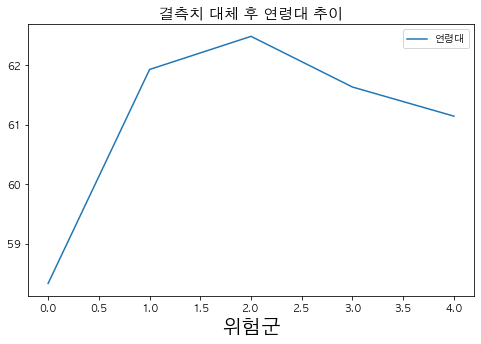

In [50]:
df_final.groupby(['위험군']).mean().plot(y=['연령대'])
plt.gcf().set_size_inches(8, 5)
plt.title('결측치 대체 후 연령대 추이', fontsize=15);

#### 예측에 불필요한 특성 제거

1. 신장과 허리둘레 -> 예측인자로 활용되는 허리신장비율 특성을 생성하는 데에 사용함. 특성 자체가 예측인자로 활용되지는 않기 때문에 제거

2. 최종점수 -> 타겟 특성인 위험군 특성 생성 후 레이블링까지 마무리 했기 때문에 제거
3. 인덱스 초기화

In [51]:
df_final = df_final.drop(columns=['신장(5Cm단위)', '허리둘레', '최종점수'], axis=1).reset_index(drop=True)
df_final

,성별코드,연령대,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,중성지방,HDL 콜레스테롤,LDL 콜레스테롤,흡연상태,음주여부,허리신장비율,위험군
0,1.0,45.0,127.0,79.0,90.0,188.000000,58.000000,58.000000,118.000000,1.0,0.0,0.437,0
1,2.0,65.0,110.0,73.0,87.0,196.326753,107.014421,58.551332,116.408854,1.0,0.0,0.540,0
2,2.0,60.0,123.0,80.0,102.0,200.062149,103.676066,63.191703,116.211756,1.0,0.0,0.452,0
3,1.0,65.0,134.0,84.0,146.0,194.115555,169.881706,47.216657,113.175586,1.0,0.0,0.568,2
4,2.0,60.0,144.0,89.0,110.0,220.000000,171.000000,53.000000,133.000000,1.0,0.0,0.485,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979698,2.0,65.0,132.0,78.0,124.0,178.000000,301.000000,43.000000,75.000000,1.0,0.0,0.559,3
979699,2.0,60.0,100.0,64.0,98.0,288.000000,93.000000,71.000000,198.000000,1.0,1.0,0.478,2
979700,1.0,45.0,110.0,64.0,83.0,194.434857,114.836737,55.330437,116.471475,1.0,1.0,0.486,0
979701,2.0,45.0,137.0,82.0,111.0,208.000000,113.000000,59.000000,126.000000,1.0,0.0,0.569,0


In [52]:
# 최종 데이터셋 저장

df_final.to_csv('/Users/uisik/Desktop/keepup/project/arrhythmia_prevention/data/df_final.csv')